# Creating Speedups Graph

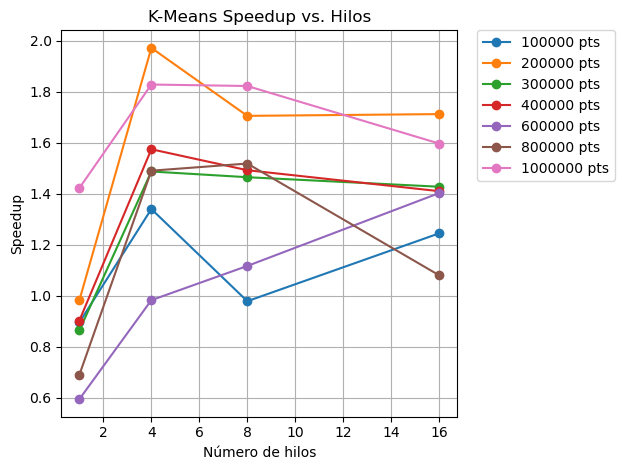

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("output/speedups.csv")
df = df[df['NumThreads'] != 0]

# Create plot
for data_size in df["DataSize"].unique():
    subset = df[df["DataSize"] == data_size]
    plt.plot(subset["NumThreads"], subset["Speedup"], marker='o', label=f"{data_size} pts")

# Labels and title
plt.xlabel("Número de hilos")
plt.ylabel("Speedup")
plt.title("K-Means Speedup vs. Hilos")
plt.grid()

# Place legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Adjust layout to fit legend
plt.tight_layout()

# Save the plot
plt.savefig(f'images/speedups.png')

# Show plot
plt.show()

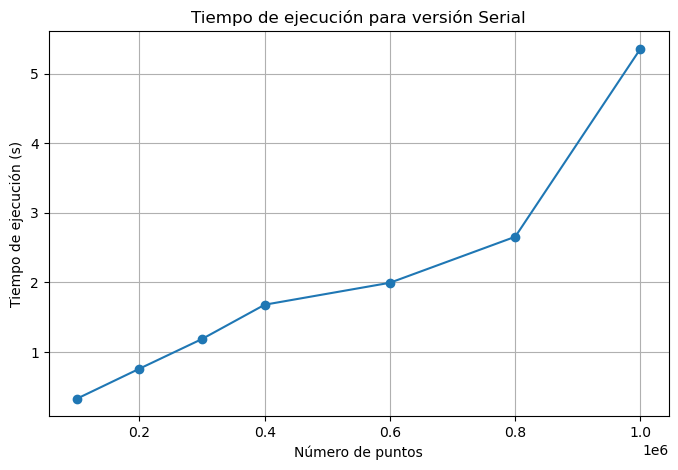

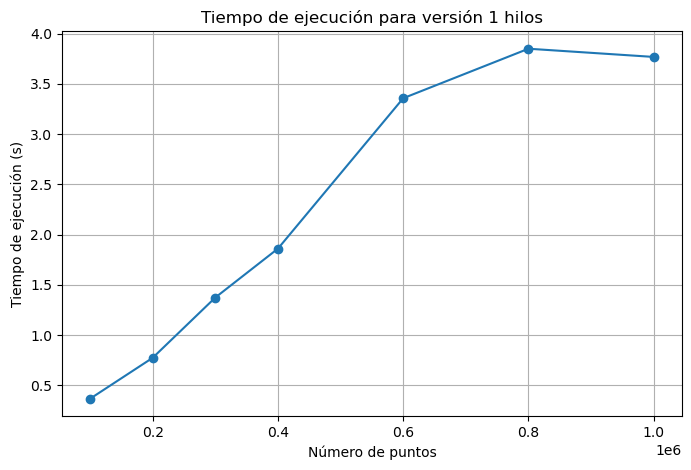

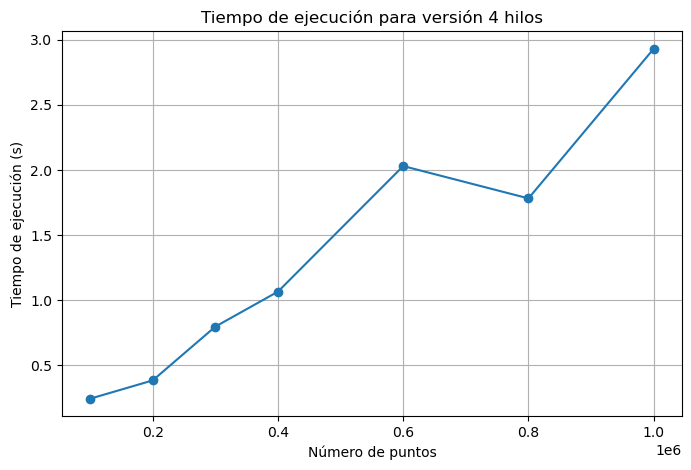

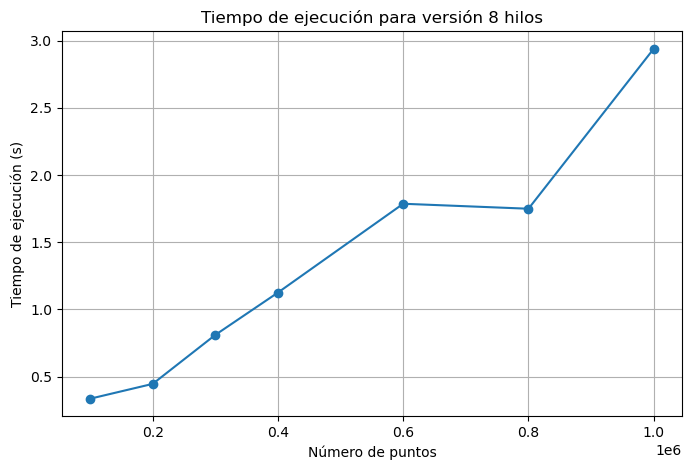

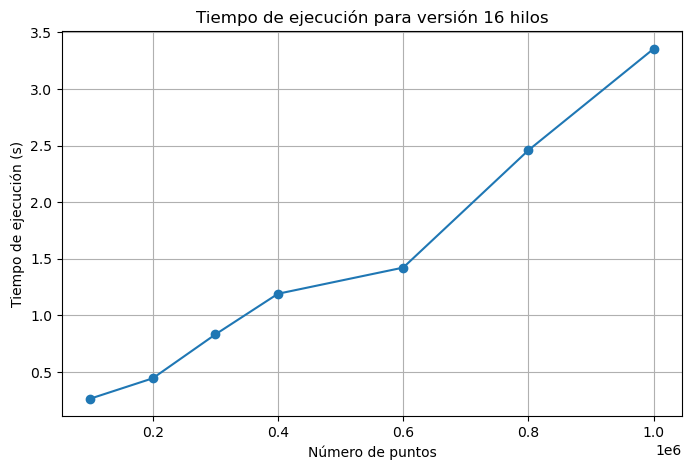

In [10]:
def plot_execution_times(csv_file):
    # Load the CSV file
    df = pd.read_csv(csv_file)
    
    # Get unique thread counts (including serial execution)
    thread_counts = df['NumThreads'].unique()
    
    # Create separate plots for each thread count
    for threads in thread_counts:
        plt.figure(figsize=(8, 5))
        
        # Filter data for the current thread count
        df_filtered = df[df['NumThreads'] == threads]
        
        # Plot execution time vs. number of points
        if threads == 0:
            lab_threads = "Serial"
        else:
            lab_threads = f'{threads} hilos'
        plt.plot(df_filtered['DataSize'], df_filtered['ParallelTime'], marker='o', linestyle='-', label=lab_threads)
        
        # Labels and title
        plt.xlabel("Número de puntos")
        plt.ylabel("Tiempo de ejecución (s)")
        plt.title(f"Tiempo de ejecución para versión {lab_threads}")
        plt.grid(True)
        
        # Save the plot
        plt.savefig(f'images/execution_time_{threads}_threads.png')
        
        # Show the plot
        plt.show()

# Example usage
plot_execution_times("output/speedups.csv")